<a href="https://colab.research.google.com/github/agubuffa/Diplo_DataScience/blob/main/modeloClasificadorDiplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Inicio

Esta actividad se realizará en grupos de cuatro participantes. Se pueden utilizar bases de datos propias o tomadas de fuentes secundarias. Como excepción el equipo docente facilitará bases de datos a los grupos con dificultades para conseguirlas.

Los objetivos de esta actividad es que los participantes sean capaces de:

Resolver un problema seleccionando las técnicas estadísticas y econométricas adecuadas. Informar los resultados adecuadamente.

En base a un problema y objetivos concretos que se propongan, el trabajo debe incluir:

A) un análisis descriptivo e inferencial de las variables,
B) un análisis multivariado
C) un modelo econométrico

Se debe presentar un informe final y un archivo con extensión .ipynb con los códigos del trabajo.

El informe final debe estar estructurado en las partes A, B y C indicadas en el párrafo anterior y cada una debe contener:

Descripción del problema, hipótesis de trabajo y datos utilizados.
Identificación de las técnicas estadísticas y econométricas aplicadas justificando la elección. Es fundamental tener en cuenta las condiciones y limitaciones de las técnicas seleccionadas.
Resultados con las interpretaciones correspondientes.
Conclusiones finales.
Debe ser un reporte breve que debe cumplir las siguientes condiciones formales: máximo de 5 páginas tamaño A4, márgenes normales, letra Arial o Times New Roman 12, interlineado simple.

El archivo con extensión .ipynb debe incluir el enlace a la base de datos y todos los códigos de programación utilizados en el trabajo.

La evaluación será grupal y se tendrán cuenta los siguientes aspectos:

Adecuación de las técnicas estadísticas o econométricas utilizadas en función al problema e hipótesis planteado.
Exposición e interpretación de resultados.
Presentación clara y ordenada del informe.
El criterio de acreditación es cuantitativo (nota del 1 al 10). Con una nota mínima de 7 (siete) para aprobar.

Fecha de entrega: 12/10


In [ ]:
!pip install gdown 

In [ ]:
import gdown
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
path = 'https://drive.google.com/uc?id=1Lr8dnMLhSpV3xyqlG6sVRKIq2g43Y6nA'
output = 'marketing_campaign.xlsx'
gdown.download(path, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1Lr8dnMLhSpV3xyqlG6sVRKIq2g43Y6nA
To: /content/marketing_campaign.xlsx
100%|██████████| 313k/313k [00:00<00:00, 14.6MB/s]


'marketing_campaign.xlsx'

In [ ]:
path1="marketing_campaign.xlsx"
df1=pd.read_excel(path1)
df1.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0  5524        1957  Graduation         Single  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88   
1  2174        1954  Graduation         Single  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6   
2  4141        1965  Graduation       Together  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42   
3  6182        1984  Graduation       Together  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5   
4  5324        1981         PhD        Married  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  \
0                  3                8                   10                  4                  7             0             0             0             0             0         0              3   
1                  2                1                    1                  2                  5             0             0             0             0             0         0              3   
2                  1                8                    2                 10                  4             0             0             0             0             0         0              3   
3                  2                2                    0                  4                  6             0             0             0             0             0         0              3   
4                  5                5                    3                  6                  5             0             0             0             0             0         0              3   

   Z_Revenue  Response  
0         11         1  
1         11         0  
2         11         0  
3         11         0  
4         11         0

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

# **Significado de cada variable**

**0.ID:** Número identificador del cliente

**1.Year_Birth:** Año de Nacimiento del cliente

**2.Education:** Nivel de educación del cliente

**3.Marital_Status**: Estado civil del cliente

**4.Income:** Ingreso familiar anual del cliente

**5.Kidhome:** Cantidad de hijos menores del cliente

**6.Teenhome:** Cantidad de hijos adolescentes del cliente

**7.Dt_Customer:** Fecha de registro del cliente con la compañia

**8.Recency:** Días desde la última compra del cliente

**9.MntWines:** Monto gastado en vinos en los últimos 2 años

**10.MntFruits:** Monto gastado en frutas en los últimos 2 años

**11.MntMeatProducts:** Monto gastado en carne en los últimos 2 años

**12.MntFishProducts:** Monto gastado en pescado en los últimos 2 años

**13.MntSweetProducts:** Monto gastado en golosinas en los últimos 2 años

**14.MntGoldProds:** Monto gastado en oro en los últimos 2 años

**15.NumDealsPurchases:** Número de compras realizadas con un descuento

**16.NumWebPurchases:** Cantidad de compras realizadas a través de la página web

**17.NumCatalogPurchases:** Cantidad de compras realizadas mediante catalogo

**18.NumStorePurchases:** Cantidad de compras realizadas directamente en tiendas

**19.NumWebVisitsMonth:** Cantidad de visitas a la pagina web en el último mes

**20.AcceptedCmp1:** 1 si el cliente acepto la oferta en la 1er campaña, de lo contrario 0

**21.AcceptedCmp2:** 1 si el cliente acepto la oferta en la 2da campaña, de lo contrario 0

**22.AcceptedCmp3:** 1 si el cliente acepto la oferta en la 3ra campaña, de lo contrario 0

**23.AcceptedCmp4:** 1 si el cliente acepto la oferta en la 4ta campaña, de lo contrario 0

**24.AcceptedCmp5:**1 si el cliente acepto la oferta en la 5ta campaña, de lo contrario 0

**25.Complain:** 1 si el cliente realizó quejas en los últimos 2 años, de lo contrario 0

**26.Z_CostContact:** No hay información sobre el significado de esta variable

**27.Z_revenue:** No hay información sobre el significado de esta variable

**28.Response:** 1 si el cliente aceptó la oferta en la última campaña, de lo contrario 0


Grupos por edad, por ingreso

Hipotesis: las personas de mayor ingreso pueden aprovechar las ofertas porque pueden elegir cuando comprar mientras que las de menor ingreso compran cuando pueden.
Ver consumo total de productos y ver cual es el % en la canasta según la composición familiar.
Tendencia de consumo según canales.

Objetivos:

1- Determinar la composición del gasto por cada tipo de consumidor en función a sus variables sociodemograficas.

Determinar tipos de consumidor (cluster). Y luego agrupar por gasto.


2- Identificar los canales de compra de preferencia del cliente en función a su edad, ingreso y nivel de educación.

Determinar tipos de consumidor (cluster).  agrupar por canales.

3- Efectividad de las campañas de marketing en función a su repetición para cada grupo cliente determinado. Mezclar con los otros obejtivos para ver por canal, por gasto, etc. Cantidad maxima de campañas para optimizar el total de campañas a realizar. Rendimientos marginales? Identificar el foco de la campaña por tipo de productos consumidos por los grupos de clientes.

De los grupos definidos anteriormente, ver en que campaña hicieron la compra.
Mezclar con 2 y 3.

4- Determinar si el gasto total se da en función de variables sociodemograficas (ingreso, cantidad de hijos chicso, adolescentes, marial status, educación y edad). Hacer por cada tipo de producto.

Se puede realizar con una regresión lineal (libro de colombia - triana 2019). Unir con el 4 para ver variables determinantes para la efectividad de las campañas.



In [ ]:
df1.describe()

ID   Year_Birth         Income      Kidhome     Teenhome      Recency     MntWines    MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000  2240.000000  2240.000000  2240.000000      2240.000000      2240.000000       2240.000000   2240.000000        2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250    49.109375   303.935714    26.302232       166.950000        37.525446         27.062946     44.021875           2.325000   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538    28.962453   336.597393    39.773434       225.715373        54.628979         41.280498     52.167439           1.932238   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000     0.000000     0.000000     0.000000         0.000000         0.000000          0.000000      0.000000           0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000    24.000000    23.750000     1.000000        16.000000         3.000000          1.000000      9.000000           1.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000    49.000000   173.500000     8.000000        67.000000        12.000000          8.000000     24.000000           2.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000    74.000000   504.250000    33.000000       232.000000        50.000000         33.000000     56.000000           3.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000    99.000000  1493.000000   199.000000      1725.000000       259.000000        263.000000    362.000000          15.000000   

       NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  Z_Revenue  \
count      2240.000000          2240.000000        2240.000000        2240.000000   2240.000000   2240.000000   2240.000000   2240.000000   2240.000000  2240.000000         2240.0     2240.0   
mean          4.084821             2.662054           5.790179           5.316518      0.072768      0.074554      0.072768      0.064286      0.013393     0.009375            3.0       11.0   
std           2.778714             2.923101           3.250958           2.426645      0.259813      0.262728      0.259813      0.245316      0.114976     0.096391            0.0        0.0   
min           0.000000             0.000000           0.000000           0.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000            3.0       11.0   
25%           2.000000             0.000000           3.000000           3.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000            3.0       11.0   
50%           4.000000             2.000000           5.000000           6.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000            3.0       11.0   
75%           6.000000             4.000000           8.000000           7.000000      0.000000      0.000000      0.000000      0.000000      0.000000     0.000000            3.0       11.0   
max          27.000000            28.000000          13.000000          20.000000      1.000000      1.000000      1.000000      1.000000      1.000000     1.000000            3.0       11.0   

          Response  
count  2240.000000  
mean      0.149107  
std       0.356274  
min       0.000000  
25%       0.000000  
50%       0.000000  
75%       0.000000  
max       1.000000

Se observa que las variables Z_CostContact y Z_Revenue, de las cuales no se contaba con información del significado de la variable, son constantes. Por este motivo se procede a eliminarlos del data set.



In [ ]:
df2 = df1.drop(['Z_CostContact','Z_Revenue'], axis = 1)
df2.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0  5524        1957  Graduation         Single  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88   
1  2174        1954  Graduation         Single  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6   
2  4141        1965  Graduation       Together  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42   
3  6182        1984  Graduation       Together  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5   
4  5324        1981         PhD        Married  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  
0                  3                8                   10                  4                  7             0             0             0             0             0         0         1  
1                  2                1                    1                  2                  5             0             0             0             0             0         0         0  
2                  1                8                    2                 10                  4             0             0             0             0             0         0         0  
3                  2                2                    0                  4                  6             0             0             0             0             0         0         0  
4                  5                5                    3                  6                  5             0             0             0             0             0         0         0

In [ ]:
#Se obtienen los nombres de las columnas en una lista
columnas = []
for i in df2:
  columnas.append(i)

In [ ]:
#Se observan los valores únicos de cada columna
df2[columnas].nunique(axis=0, dropna=False)

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Response                  2
dtype: int64

In [ ]:
#Se observa cuantos valores nulos tiene cada columna
missing_values_count=df2.isna().sum()
missing_values_count

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Response                0
dtype: int64

In [ ]:
#Se procede a rellenar los valores nulos con la media. Se decidió rellenar con el valor de la media ya que eran pocos valores.
df2['Income'].fillna(value=df2['Income'].mean(), inplace=True)

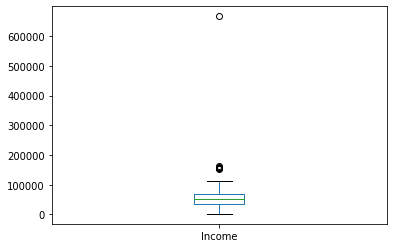

In [ ]:
#Se grafica la variable 'Income' para detectar outliers porque se observó, con el método describe, que existe un valor outlier de 666.666.
plot = df2['Income'].plot(kind="box")
plt.show()

In [ ]:
#Se crea una máscara para filtrar el valor 666.666
mask = df2[df2['Income']>200000].index
df2.drop(labels = mask, axis = 0, inplace = True)

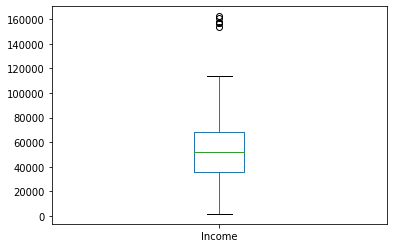

In [ ]:
#Se vuelve a graficar para identificar outliers
Income_1 = df2['Income']
plot = Income_1.plot(kind="box")
plt.show()

In [ ]:
#Se crea una función para normalizar columnas con el método IQR
def normalize (df):
    Q1 = df.quantile(0.25, interpolation = 'midpoint')
    Q3 = df.quantile(0.75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    print( "Old Shape: ", df.shape)
 
    # Upper bound
    upper = np.where(df >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df <= (Q1-1.5*IQR))
 
    ''' Removing the Outliers '''
    df.drop(upper[0], inplace = True)
    df.drop(lower[0], inplace = True)
 
    print("New Shape: ", df.shape)

In [ ]:
#Se aplica la normalización al objeto creado con la columna 'Income'
normal = normalize(Income_1)

Old Shape:  (2239,)
New Shape:  (2232,)


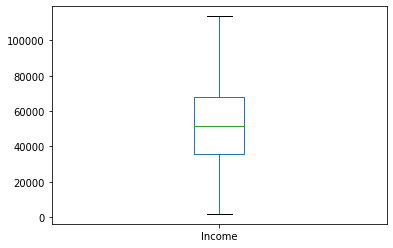

In [ ]:
#Se vuelve a graficar para verificar los cambios realizados
plot = Income_1.plot(kind="box")
plt.show()


In [ ]:
def age (df):
  column_age =[]
  for i in df:
    a = 2021 - df[i]
    column_age.append(a)
  return column_age

In [ ]:
age_col = age(df2['Year_Birth'])
df3 = df2.assign(Age=age_col)

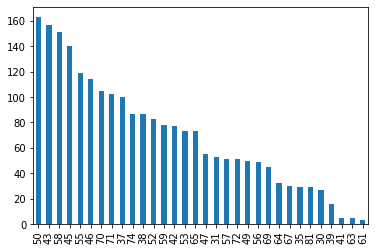

In [ ]:
Age_1= df3['Age'].value_counts()
plot2 = Age_1.plot(kind="bar")
plt.show()

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text major ticklabel objects>)

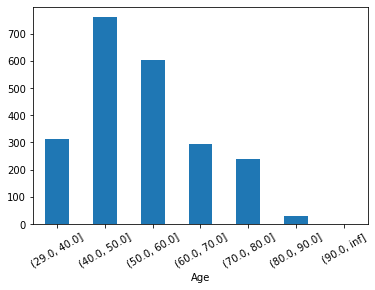

In [ ]:
plotage= df3.groupby(pd.cut(df3['Age'],[29,40,50,60,70,80,90, float('inf')])).count()
plotage['Age'].plot(kind = "bar")
plt.xticks(rotation=30)


In [ ]:
df3

ID  Year_Birth   Education Marital_Status         Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0      5524        1957  Graduation         Single   58138.000000        0         0  2012-09-04       58       635         88              546              172                88            88   
1      2174        1954  Graduation         Single   46344.000000        1         1  2014-03-08       38        11          1                6                2                 1             6   
2      4141        1965  Graduation       Together   71613.000000        0         0  2013-08-21       26       426         49              127              111                21            42   
3      6182        1984  Graduation       Together   26646.000000        1         0  2014-02-10       26        11          4               20               10                 3             5   
4      5324        1981         PhD        Married   58293.000000        1         0  2014-01-19       94       173         43              118               46                27            15   
5      7446        1967      Master       Together   62513.000000        0         1  2013-09-09       16       520         42               98                0                42            14   
6       965        1971  Graduation       Divorced   55635.000000        0         1  2012-11-13       34       235         65              164               50                49            27   
7      6177        1985         PhD        Married   33454.000000        1         0  2013-05-08       32        76         10               56                3                 1            23   
8      4855        1974         PhD       Together   30351.000000        1         0  2013-06-06       19        14          0               24                3                 3             2   
9      5899        1950         PhD       Together    5648.000000        1         1  2014-03-13       68        28          0                6                1                 1            13   
10     1994        1983  Graduation        Married   52247.251354        1         0  2013-11-15       11         5          5                6                0                 2             1   
11      387        1976       Basic        Married    7500.000000        0         0  2012-11-13       59         6         16               11               11                 1            16   
12     2125        1959  Graduation       Divorced   63033.000000        0         0  2013-11-15       82       194         61              480              225               112            30   
13     8180        1952      Master       Divorced   59354.000000        1         1  2013-11-15       53       233          2               53                3                 5            14   
14     2569        1987  Graduation        Married   17323.000000        0         0  2012-10-10       38         3         14               17                6                 1             5   
15     2114        1946         PhD         Single   82800.000000        0         0  2012-11-24       23      1006         22              115               59                68            45   
16     9736        1980  Graduation        Married   41850.000000        1         1  2012-12-24       51        53          5               19                2                13             4   
17     4939        1946  Graduation       Together   37760.000000        0         0  2012-08-31       20        84          5               38              150                12            28   
18     6565        1949      Master        Married   76995.000000        0         1  2013-03-28       91      1012         80              498                0                16           176   
19     2278        1985    2n Cycle         Single   33812.000000        1         0  201

In [ ]:
df3["sumatoria_gastos"]=df3["MntWines"]+df3["MntFruits"]+df3["MntMeatProducts"]+df3["MntFishProducts"]+df3["MntGoldProds"]
df3

ID  Year_Birth   Education Marital_Status         Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0      5524        1957  Graduation         Single   58138.000000        0         0  2012-09-04       58       635         88              546              172                88            88   
1      2174        1954  Graduation         Single   46344.000000        1         1  2014-03-08       38        11          1                6                2                 1             6   
2      4141        1965  Graduation       Together   71613.000000        0         0  2013-08-21       26       426         49              127              111                21            42   
3      6182        1984  Graduation       Together   26646.000000        1         0  2014-02-10       26        11          4               20               10                 3             5   
4      5324        1981         PhD        Married   58293.000000        1         0  2014-01-19       94       173         43              118               46                27            15   
5      7446        1967      Master       Together   62513.000000        0         1  2013-09-09       16       520         42               98                0                42            14   
6       965        1971  Graduation       Divorced   55635.000000        0         1  2012-11-13       34       235         65              164               50                49            27   
7      6177        1985         PhD        Married   33454.000000        1         0  2013-05-08       32        76         10               56                3                 1            23   
8      4855        1974         PhD       Together   30351.000000        1         0  2013-06-06       19        14          0               24                3                 3             2   
9      5899        1950         PhD       Together    5648.000000        1         1  2014-03-13       68        28          0                6                1                 1            13   
10     1994        1983  Graduation        Married   52247.251354        1         0  2013-11-15       11         5          5                6                0                 2             1   
11      387        1976       Basic        Married    7500.000000        0         0  2012-11-13       59         6         16               11               11                 1            16   
12     2125        1959  Graduation       Divorced   63033.000000        0         0  2013-11-15       82       194         61              480              225               112            30   
13     8180        1952      Master       Divorced   59354.000000        1         1  2013-11-15       53       233          2               53                3                 5            14   
14     2569        1987  Graduation        Married   17323.000000        0         0  2012-10-10       38         3         14               17                6                 1             5   
15     2114        1946         PhD         Single   82800.000000        0         0  2012-11-24       23      1006         22              115               59                68            45   
16     9736        1980  Graduation        Married   41850.000000        1         1  2012-12-24       51        53          5               19                2                13             4   
17     4939        1946  Graduation       Together   37760.000000        0         0  2012-08-31       20        84          5               38              150                12            28   
18     6565        1949      Master        Married   76995.000000        0         1  2013-03-28       91      1012         80              498                0                16           176   
19     2278        1985    2n Cycle         Single   33812.000000        1         0  201

In [ ]:
#Adecuación de variables categoricas

In [ ]:
#Education
print(df3.Education.unique())
print(len(df3.Education.unique()))

['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
5


In [ ]:
pd.value_counts(df3.Education)

Graduation    1126
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [ ]:
#Reemplazamos sus nombres por variables categóricas del 1 al 5
df3["Education"]=df3["Education"].replace("Basic","1")
df3["Education"]=df3["Education"].replace("2n Cycle","2")
df3["Education"]=df3["Education"].replace("Graduation","3")
df3["Education"]=df3["Education"].replace("Master","4")
df3["Education"]=df3["Education"].replace("PhD","5")
df3["Education"]

0       3
1       3
2       3
3       3
4       5
5       4
6       3
7       5
8       5
9       5
10      3
11      1
12      3
13      4
14      3
15      5
16      3
17      3
18      4
19      2
20      3
21      3
22      5
23      5
24      3
25      3
26      3
27      3
28      3
29      5
30      4
31      4
32      3
33      5
34      4
35      4
36      5
37      2
38      3
39      5
40      3
41      4
42      3
43      5
44      4
45      3
46      2
47      3
48      3
49      5
50      3
51      4
52      3
53      3
54      3
55      4
56      3
57      3
58      3
59      5
60      4
61      3
62      3
63      5
64      3
65      3
66      3
67      2
68      3
69      3
70      4
71      2
72      3
73      5
74      3
75      3
76      4
77      3
78      2
79      3
80      3
81      3
82      2
83      4
84      3
85      3
86      4
87      3
88      3
89      3
90      5
91      3
92      4
93      4
94      5
95      3
96      3
97      3
98      2
99      5


In [ ]:
df3["Education"] = df3["Education"].astype(str).astype(int)
df3["Education"]

0       3
1       3
2       3
3       3
4       5
5       4
6       3
7       5
8       5
9       5
10      3
11      1
12      3
13      4
14      3
15      5
16      3
17      3
18      4
19      2
20      3
21      3
22      5
23      5
24      3
25      3
26      3
27      3
28      3
29      5
30      4
31      4
32      3
33      5
34      4
35      4
36      5
37      2
38      3
39      5
40      3
41      4
42      3
43      5
44      4
45      3
46      2
47      3
48      3
49      5
50      3
51      4
52      3
53      3
54      3
55      4
56      3
57      3
58      3
59      5
60      4
61      3
62      3
63      5
64      3
65      3
66      3
67      2
68      3
69      3
70      4
71      2
72      3
73      5
74      3
75      3
76      4
77      3
78      2
79      3
80      3
81      3
82      2
83      4
84      3
85      3
86      4
87      3
88      3
89      3
90      5
91      3
92      4
93      4
94      5
95      3
96      3
97      3
98      2
99      5


In [ ]:
#Marital_Status
print(df3.Marital_Status.unique())
print(len(df3.Marital_Status.unique()))

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
8


In [ ]:
pd.value_counts(df3.Marital_Status)

Married     864
Together    579
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [ ]:
#Eliminamos Absurd que no tiene sentido y solo son 2 filas
df3=df3.drop(df3[(df3.Marital_Status == 'Absurd')].index)
print(df3.Marital_Status.unique())
print(len(df3.Marital_Status.unique()))

['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'YOLO']
7


In [ ]:
#Vamosa agrupar Marital_Status
def Marital_Status(row):
   a=['Married', 'Together']
   b=['Single', 'Alone','YOLO']
   c=['Widow', "Divorced"]

   if row.Marital_Status in a:
        return "a"
   if row.Marital_Status in b:
        return "b"
   if row.Marital_Status in c:
        return "c"
   
   return row.Marital_Status
def Marital_Status2 (playlist):
    df4 = df3.copy()
    df4["Marital_Status"] = df4.apply(lambda row: Marital_Status(row), axis=1)
    return df4
df4= Marital_Status2(df3)
pd.value_counts(df4["Marital_Status"]).sort_index()

a    1443
b     485
c     309
Name: Marital_Status, dtype: int64

In [ ]:
#Reemplazamos las letras por 1 2 3 4 para luego poder aplicar correctamente nuestra regresión. 
df4["Marital_Status"]=df4["Marital_Status"].replace("a",1)
df4["Marital_Status"]=df4["Marital_Status"].replace("b",2)
df4["Marital_Status"]=df4["Marital_Status"].replace("c",3)

df4["Marital_Status"]

0       2
1       2
2       1
3       1
4       1
5       1
6       3
7       1
8       1
9       1
10      1
11      1
12      3
13      3
14      1
15      2
16      1
17      1
18      1
19      2
20      1
21      1
22      1
23      1
24      1
25      2
26      1
27      2
28      1
29      1
30      3
31      1
32      1
33      3
34      1
35      2
36      1
37      1
38      3
39      3
40      1
41      1
42      1
43      2
44      1
45      2
46      1
47      1
48      2
49      1
50      3
51      1
52      2
53      3
54      1
55      1
56      3
57      2
58      2
59      1
60      2
61      1
62      2
63      3
64      1
65      1
66      1
67      2
68      1
69      1
70      1
71      1
72      1
73      1
74      1
75      3
76      1
77      2
78      1
79      1
80      2
81      1
82      1
83      1
84      3
85      1
86      1
87      2
88      1
89      1
90      1
91      2
92      1
93      2
94      1
95      1
96      3
97      3
98      1
99      1


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2237 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2237 non-null   int64         
 1   Year_Birth           2237 non-null   int64         
 2   Education            2237 non-null   int64         
 3   Marital_Status       2237 non-null   int64         
 4   Income               2237 non-null   float64       
 5   Kidhome              2237 non-null   int64         
 6   Teenhome             2237 non-null   int64         
 7   Dt_Customer          2237 non-null   datetime64[ns]
 8   Recency              2237 non-null   int64         
 9   MntWines             2237 non-null   int64         
 10  MntFruits            2237 non-null   int64         
 11  MntMeatProducts      2237 non-null   int64         
 12  MntFishProducts      2237 non-null   int64         
 13  MntSweetProducts     2237 non-nul

In [ ]:
#Niños
print(df3.Kidhome.unique())
print(len(df3.Kidhome.unique()))

[0 1 2]
3


In [ ]:
#adolecentes
print(df3.Teenhome.unique())
print(len(df3.Teenhome.unique()))

[0 1 2]
3


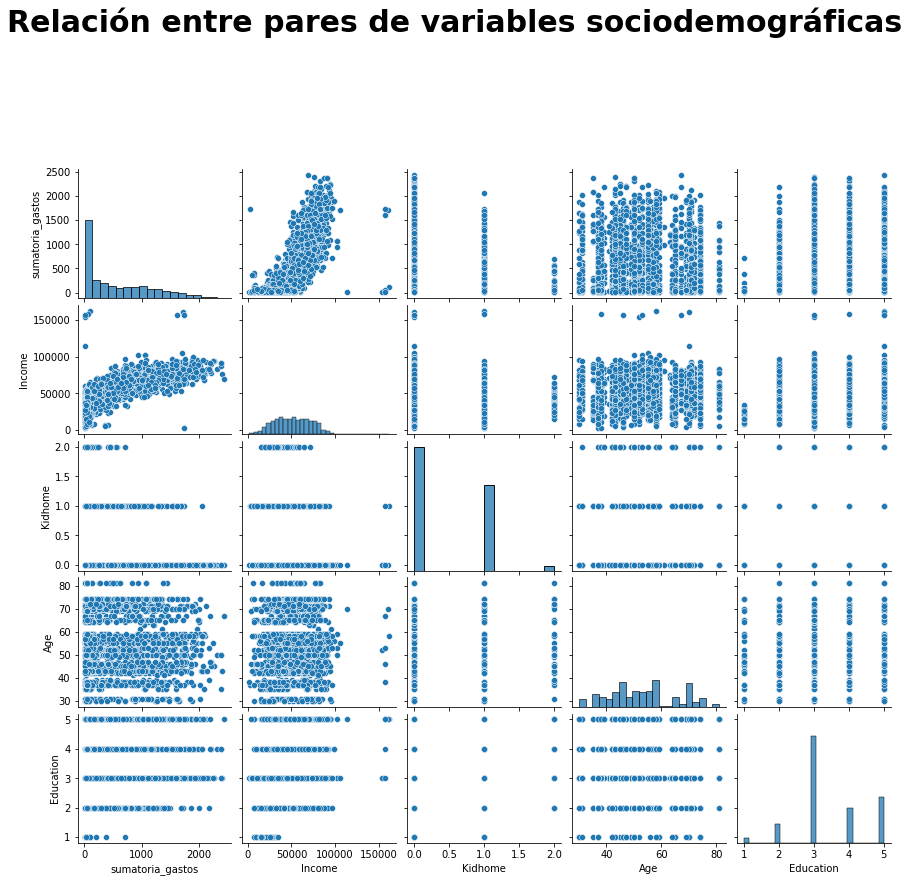

In [ ]:
#graficamos la relacion entre pares de variables sociodemográficas
g=sns.pairplot(df3[["sumatoria_gastos", "Income", "Kidhome", "Age", "Marital_Status", "Education"]])
g.fig.suptitle("Relación entre pares de variables sociodemográficas", fontsize=30, fontweight="bold")
plt.subplots_adjust(top=0.8)
plt.show()

In [ ]:
#Asignamos las variables a objetos
X=df4[["Income", "Kidhome", "Teenhome", "Age", "Marital_Status", "Education"]]
Y=df4["sumatoria_gastos"]

In [ ]:
import statsmodels.api as sm                # modelos estadísticos
import statsmodels.stats.api as sms         # módulo stats de statsmodels

In [ ]:
pd.value_counts(df4["AcceptedCmp1"]).sort_index()

0    2094
1     143
Name: AcceptedCmp1, dtype: int64

In [ ]:
pd.value_counts(df4["AcceptedCmp2"]).sort_index()

0    2207
1      30
Name: AcceptedCmp2, dtype: int64

In [ ]:
pd.value_counts(df4["AcceptedCmp3"]).sort_index()

0    2074
1     163
Name: AcceptedCmp3, dtype: int64

In [ ]:
pd.value_counts(df4["AcceptedCmp4"]).sort_index()

0    2070
1     167
Name: AcceptedCmp4, dtype: int64

In [ ]:
pd.value_counts(df4["AcceptedCmp5"]).sort_index()

0    2075
1     162
Name: AcceptedCmp5, dtype: int64

In [ ]:
pd.value_counts(df4["Response"]).sort_index()


0    1904
1     333
Name: Response, dtype: int64

In [ ]:
df4["acepto_campanas"]=df4["AcceptedCmp1"]+df4["AcceptedCmp2"]+df4["AcceptedCmp3"]+df4["AcceptedCmp4"]+df4["AcceptedCmp5"]+ df4["Response"]
df4["acepto_campanas"]

0       1
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       1
9       1
10      0
11      0
12      0
13      0
14      0
15      3
16      0
17      0
18      1
19      0
20      0
21      0
22      1
23      0
24      0
25      0
26      0
27      0
28      0
29      1
30      0
31      0
32      1
33      1
34      0
35      0
36      0
37      0
38      0
39      2
40      0
41      0
42      0
43      0
44      0
45      0
46      1
47      0
48      0
49      0
50      0
51      0
52      0
53      3
54      0
55      2
56      1
57      0
58      0
59      0
60      3
61      0
62      0
63      0
64      0
65      1
66      0
67      3
68      0
69      0
70      0
71      0
72      0
73      1
74      0
75      0
76      1
77      2
78      0
79      2
80      0
81      0
82      0
83      0
84      0
85      0
86      1
87      3
88      1
89      0
90      0
91      0
92      0
93      0
94      0
95      0
96      1
97      0
98      1
99      0


In [ ]:
pd.value_counts(df4["acepto_campanas"]).sort_index()

0    1629
1     370
2     142
3      50
4      36
5      10
Name: acepto_campanas, dtype: int64

In [ ]:
df4["acepto_campanas"]=df4["acepto_campanas"].replace(2,1)
df4["acepto_campanas"]=df4["acepto_campanas"].replace(3,1)
df4["acepto_campanas"]=df4["acepto_campanas"].replace(4,1)
df4["acepto_campanas"]=df4["acepto_campanas"].replace(5,1)

In [ ]:
pd.value_counts(df4["acepto_campanas"]).sort_index()

0    1629
1     608
Name: acepto_campanas, dtype: int64

In [ ]:
#Tabla de frecuencia relativas para la variable de si el cliente ha aceptado alguna campaña (acepto_campanas)
df4.acepto_campanas.value_counts(normalize=True).sort_index()

0    0.728207
1    0.271793
Name: acepto_campanas, dtype: float64

In [ ]:
#Se crea una nueva variable con la sumatoria de las compras realizadas en cada canal
df4["sumatoria_compras"]=df4["NumWebPurchases"]+df4["NumCatalogPurchases"]+df4["NumStorePurchases"]

In [ ]:
import datetime as dt

In [ ]:
def days_between(d1, d2):
    d1 = datetime.strptime(d1, "%Y-%m-%d")
    d2 = datetime.strptime(df, "%Y-%m-%d")
    return abs((d1 - d2).days)

In [ ]:
fecha2 = pd.datetime.now()
df4["dif_de_dias"]= (fecha2-df4["Dt_Customer"]).dt.days

print(fecha2)
df4.head()

2021-10-12 22:07:38.733352


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0  5524        1957          3               2  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88   
1  2174        1954          3               2  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6   
2  4141        1965          3               1  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42   
3  6182        1984          3               1  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5   
4  5324        1981          5               1  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                  3                8                   10                  4                  7             0             0             0             0             0         0         1   65   
1                  2                1                    1                  2                  5             0             0             0             0             0         0         0   57   
2                  1                8                    2                 10                  4             0             0             0             0             0         0         0   74   
3                  2                2                    0                  4                  6             0             0             0             0             0         0         0   46   
4                  5                5                    3                  6                  5             0             0             0             0             0         0         0   47   

   sumatoria_gastos  acepto_campanas  sumatoria_compras  dif_de_dias  
0              1529                1                 22         3325  
1                26                0                  4         2775  
2               755                0                 20         2974  
3                50                0                  6         2801  
4               395                0                 14         2823

In [ ]:
def Dt_Customer (df):
  fecha_dias =[]
  for i in df:
    a1=datetime.datetime.today()- datetime.datetime(df[i])
    
    fecha_dias.append(a1)
  return fecha_dias


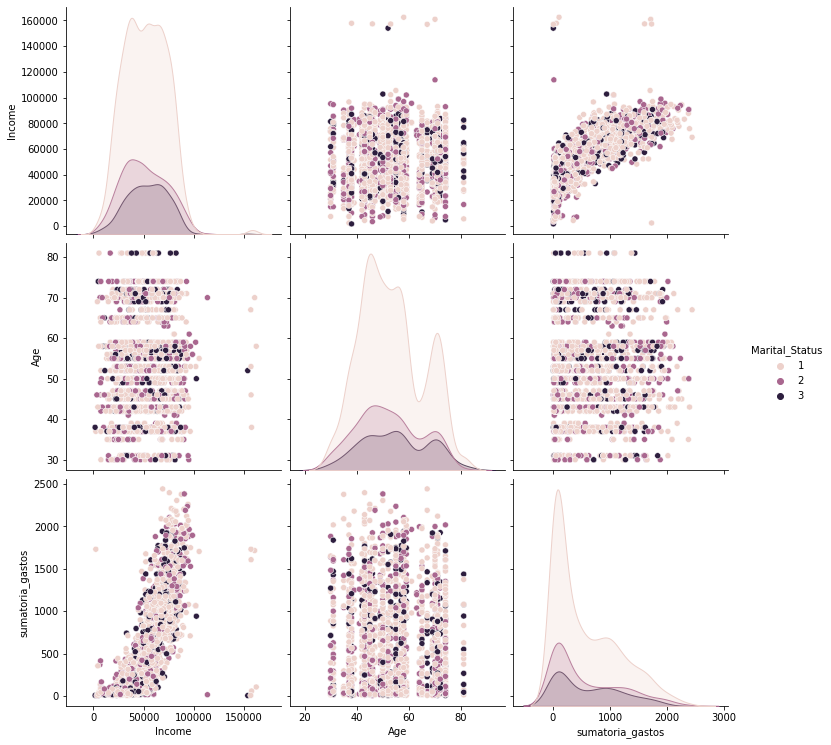

In [ ]:
Plot1 = ["Income", "Age", "sumatoria_gastos", "Marital_Status"]
sns.pairplot(df4[Plot1], hue = 'Marital_Status', height=3.5)

## **REGRESION LOGISTICA**

> Bloque con sangría



In [ ]:
# Regresión logística en la cual las variables sociodemográficas puedan predecir si el cliente acepta o no acepta la campaña de marketing

In [ ]:
# Preprocesado y modelado
# ==============================================================================
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.weightstats import ttest_ind

In [ ]:
import statsmodels.api as sm                # modelos estadísticos
import statsmodels.stats.api as sms         # módulo stats de statsmodels

In [ ]:
#Asignamos las variables a objetos
X=df4[["Income", "Kidhome", "Teenhome", "Age", "Marital_Status", "Education"]]
Y=df4["sumatoria_gastos"]

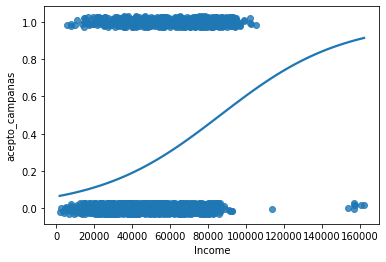

In [ ]:
#graficas de 1 sola variable
sns.regplot(x="Income", y="acepto_campanas",
            y_jitter=0.03, 
            data=df4,
            logistic=True,
            ci=None)

plt.show()

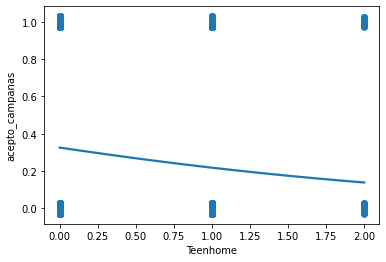

In [ ]:
sns.regplot(x="Teenhome", y="acepto_campanas",
            y_jitter=0.03, 
            data=df4,
            logistic=True,
            ci=None)
plt.show()

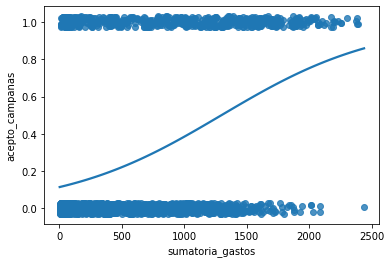

In [ ]:
sns.regplot(x="sumatoria_gastos", y="acepto_campanas",
            y_jitter=0.03, 
            data=df4,
            logistic=True,
            ci=None)
plt.show()

In [ ]:
df4.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0  5524        1957          3               2  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88   
1  2174        1954          3               2  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6   
2  4141        1965          3               1  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42   
3  6182        1984          3               1  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5   
4  5324        1981          5               1  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                  3                8                   10                  4                  7             0             0             0             0             0         0         1   65   
1                  2                1                    1                  2                  5             0             0             0             0             0         0         0   57   
2                  1                8                    2                 10                  4             0             0             0             0             0         0         0   74   
3                  2                2                    0                  4                  6             0             0             0             0             0         0         0   46   
4                  5                5                    3                  6                  5             0             0             0             0             0         0         0   47   

   sumatoria_gastos  acepto_campanas  sumatoria_compras  dif_de_dias  
0              1529                1                 22         3325  
1                26                0                  4         2775  
2               755                0                 20         2974  
3                50                0                  6         2801  
4               395                0                 14         2823

In [ ]:
df4['Hijos']=df4['Kidhome']+df4['Teenhome']
df4['Tiene_hijos'] = np.where(df4.Hijos> 0, 1, 0)
df4.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0  5524        1957          3               2  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88   
1  2174        1954          3               2  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6   
2  4141        1965          3               1  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42   
3  6182        1984          3               1  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5   
4  5324        1981          5               1  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                  3                8                   10                  4                  7             0             0             0             0             0         0         1   65   
1                  2                1                    1                  2                  5             0             0             0             0             0         0         0   57   
2                  1                8                    2                 10                  4             0             0             0             0             0         0         0   74   
3                  2                2                    0                  4                  6             0             0             0             0             0         0         0   46   
4                  5                5                    3                  6                  5             0             0             0             0             0         0         0   47   

   sumatoria_gastos  acepto_campanas  sumatoria_compras  dif_de_dias  Hijos  Tiene_hijos  
0              1529                1                 22         3325      0            0  
1                26                0                  4         2775      2            1  
2               755                0                 20         2974      0            0  
3                50                0                  6         2801      1            1  
4               395                0                 14         2823      1            1

In [ ]:
#Indcicamos las variables independientes y de respuesta
x1=df4[["Income", "Hijos","Education","Age", "Marital_Status","dif_de_dias","Recency","sumatoria_gastos","sumatoria_compras", "NumDealsPurchases","NumWebVisitsMonth" ]]

y1=df4["acepto_campanas"]



In [ ]:
#Ajuste con StatsModels
x1= sm.add_constant(x1, prepend=True)
modelo = sm.Logit(endog=y1, exog=x1,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.478250
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        acepto_campanas   No. Observations:                 2237
Model:                          Logit   Df Residuals:                     2225
Method:                           MLE   Df Model:                           11
Date:                Tue, 12 Oct 2021   Pseudo R-squ.:                  0.1825
Time:                        22:07:45   Log-Likelihood:                -1069.8
converged:                       True   LL-Null:                       -1308.7
Covariance Type:            nonrobust   LLR p-value:                 1.775e-95
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.6062      0.957     -2.724      0.006      -4.482      -0.731
Income  

Razon de maxima verosimilitud (Likelihood Ratio)

H0) B1=B2=...=Bk = 0

H1) al menos un Bi ≠  0

El modelo logístico creado para predecir la probabilidad de que un cliente acepte la campaña de MK  es en conjunto significativo (Likelihood ratio p-value = 1.775e-95). 
Mi modelo globalmente es satisfactorio, ahora debemos analizar cada variable en forma particular para analizar cual contribuye más significativamente para predecir el comportamiento de y.

Test de Wald

H0) Bj= 0

H1) Bj ≠ 0

El valor asociado al test de Wald son los los p-value del modelo. Los predictores  Income, Hijos, Education, Marital_Status, dif_de_dias, Recency, sumatoria_gastos, sumatoria_compras, NumWebVisitsMonth, son significativos, osea que de acuerdo al test de wald son los valores que mas explican la variabilidad de la variable dependiente.

Eliminamos las variables no significativas. Osea aquellas cuyos p-valores son superiores a nuestro alfa. En nuestro caso NumDealsPurchases y age.

In [ ]:
col = x1.columns
col

Index(['const', 'Income', 'Hijos', 'Education', 'Age', 'Marital_Status', 'dif_de_dias', 'Recency', 'sumatoria_gastos', 'sumatoria_compras', 'NumDealsPurchases', 'NumWebVisitsMonth'], dtype='object')

In [ ]:
col1 = col.drop(["NumDealsPurchases", "Age"], 1)
col1

Index(['const', 'Income', 'Hijos', 'Education', 'Marital_Status', 'dif_de_dias', 'Recency', 'sumatoria_gastos', 'sumatoria_compras', 'NumWebVisitsMonth'], dtype='object')

In [ ]:
x11 = sm.add_constant(x1[col1])


In [ ]:
modelo = sm.Logit(endog=y1, exog=x11,)
modelo = modelo.fit()
print(modelo.summary())

Optimization terminated successfully.
         Current function value: 0.478594
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:        acepto_campanas   No. Observations:                 2237
Model:                          Logit   Df Residuals:                     2227
Method:                           MLE   Df Model:                            9
Date:                Tue, 12 Oct 2021   Pseudo R-squ.:                  0.1819
Time:                        22:07:45   Log-Likelihood:                -1070.6
converged:                       True   LL-Null:                       -1308.7
Covariance Type:            nonrobust   LLR p-value:                 7.111e-97
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -2.2848      0.921     -2.481      0.013      -4.090      -0.480
Income  

ODD RATIO
Podemos calcular a partir de los coeficientes asociados a las variables los odd ratio. Los odd se calculan como e elevado al coeficiente de la variable asociada. 

Si el coeficiente estimado es mayor a 1 indica que la variable está positivamente relacionado con las chances aceptar la campaña de MK.

Por cada unidad en que se incrementa la variable, las chances aceptar la camapaña aumentan en e elevado al coeficiente estimado. En % las chances estimadas de que un cliente acepte la campaña se incrementan en (OR-1)*100 = xx% por cada incremento unitario en la variable asociada.

En la siguiente tabla de razón de ODDS, puede observar que Marital_Status tiene una razón de ODDS de 1.182219, lo que indica que un aumento de una unidad en la etiqueta Marital_Status aumenta las probabilidades aceptar la oferta en un 18,22%.


In [ ]:
#Calculo de los odd ratio
print(np.exp(modelo.params))

const                0.101794
Income               1.000012
Hijos                0.741202
Education            1.080969
Marital_Status       1.185829
dif_de_dias          0.999588
Recency              0.989682
sumatoria_gastos     1.002081
sumatoria_compras    0.959177
NumWebVisitsMonth    1.284218
dtype: float64


In [ ]:
# Calculamos los Intervalos de confianza para los coeficientes del modelo
# ==========================================================
intervalos_ci = modelo.conf_int(alpha=0.05)
intervalos_ci = pd.DataFrame(intervalos_ci)
intervalos_ci.columns = ['2.5%', '97.5%']
intervalos_ci

2.5%     97.5%
const             -4.090096 -0.479516
Income             0.000001  0.000022
Hijos             -0.481375 -0.117588
Education         -0.030437  0.186152
Marital_Status     0.029442  0.311443
dif_de_dias       -0.000996  0.000171
Recency           -0.014074 -0.006670
sumatoria_gastos   0.001698  0.002459
sumatoria_compras -0.067162 -0.016197
NumWebVisitsMonth  0.183147  0.317153

Calculando los intervalos de confianza para cada variable y los odd ratio asociados al intervalo de confianza, los podemos leer por ejemplo para la variable  Marital_satutus: Con una confianza del 95% el incremento en las chances de aceptar la campaña va a estar en entre .... y ...

In [ ]:
# Predicción de probabilidades
# ==============================================================================
predicciones = modelo.predict(exog = x11)
predicciones.sample(10)

1029    0.376745
1010    0.837424
1766    0.161871
545     0.044696
395     0.520713
257     0.049015
1431    0.134509
1598    0.680199
153     0.183711
2209    0.099346
dtype: float64

In [ ]:
# Clasificación predicha. Tomamos en forma arbitraria el valor 0,50
# Si la probabilidad es menor a 0,50 se asigna al grupo cero. De lo contrario al grupo uno.
# ==============================================================================
clasificacion = np.where(predicciones<0.5, 0, 1)
clasificacion

array([1, 0, 0, ..., 1, 0, 0])

In [ ]:
# Porcentaje de concordancia
# ==============================================================================
#X_test = sm.add_constant(X_train1, prepend=True)
#predicciones = modelo.predict(exog = X_train1)
#clasificacion = np.where(predicciones<0.5, 0, 1)
accuracy = accuracy_score(
            y_true    = y1,
            y_pred    = clasificacion,
            normalize = True
           )
print("")
print(f"El porcentaje de concordnacia del test es: {100*accuracy}%")


El porcentaje de concordnacia del test es: 78.27447474295933%


Los resultados obtenidos con el conjunto indican que el modelo es capaz de clasificar correctamente el 78,27% de las observaciones.

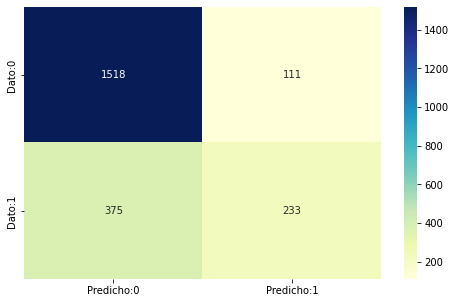

In [ ]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y1, clasificacion)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicho:0','Predicho:1'],index=['Dato:0','Dato:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
VN=cm[0,0]
VP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensibilidad=VP/float(VP+FN)
especificidad=VN/float(VN+FP)

In [ ]:
print (sensibilidad)


0.3832236842105263


In [ ]:
print (especificidad)

0.9318600368324125


Nuestra matriz de confusión nos muestra que el modelo clasifica muy bien el tipo 0, osea la no ocurrencia, lo que se ve reflejado con una especificidad del modelo del 93%. Encambio no es tan buen predictor del tipo 1, ocurrencia, ya que tiene una sensibilidad del 38%, osea que solo clasifica bien las probabilidades de exito en un 38%

In [ ]:
clasificacion2 = np.where(predicciones<0.3, 0, 1)

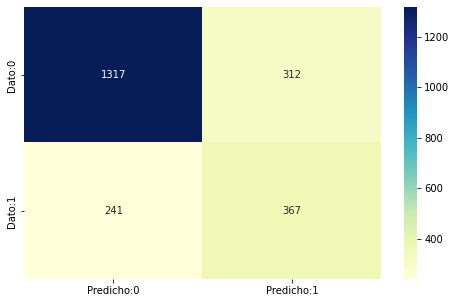

In [ ]:
#Matriz de confusion con el nuevo punto de corte 0.3
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y1, clasificacion2)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicho:0','Predicho:1'],index=['Dato:0','Dato:1'])
plt.figure(figsize = (8,5))
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="YlGnBu");

In [ ]:
VN=cm[0,0]
VP=cm[1,1]
FN=cm[1,0]
FP=cm[0,1]
sensibilidad=VP/float(VP+FN)
especificidad=VN/float(VN+FP)

In [ ]:
print (sensibilidad)


0.6036184210526315


In [ ]:
print (especificidad)

0.8084714548802947


Con este nuevo punto de corte mejora la sensibilidad del modelo clasificando mejor las observaciones tipo 1 pero desmejora la especificidad pasando de una eficacia del 93,18% a 80,85%. El punto de corte es arbitrario y depende en primera instancia si queremos tener una mejor especificidad que sensibilidad, osea del problema que estamos intentando clasificar. 


A continuación vamos a dividir el dataset en train y test; luego vamos a realizar un grafico ROC donde nos muestra si el modelo mejora al modelo nulo

In [ ]:
#Dividimos el data set en train y test.

X_train, X_test, Y_train, Y_test = train_test_split(x11, y1, train_size=0.7, test_size=0.3, random_state=100)

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.741


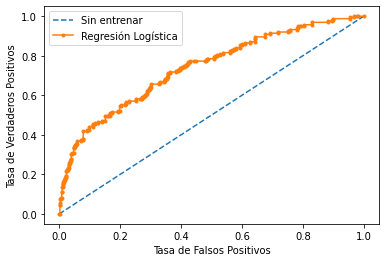

In [ ]:
#Importamos 
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

#Generamos un clasificador sin entrenar , que asignará 0 a todo
ns_probs = [0 for _ in range(len(Y_test))]
# Entrenamos nuestro modelo de reg log
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, Y_train)



# Predecimos las probabilidades
lr_probs = model.predict_proba(X_test)
#Nos quedamos con las probabilidades de la clase positiva (la probabilidad de 1)
lr_probs = lr_probs[:, 1]
# Calculamos el AUC
ns_auc = roc_auc_score(Y_test, ns_probs)
lr_auc = roc_auc_score(Y_test, lr_probs)
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(Y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(Y_test, lr_probs)
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Regresión Logística')
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

El estadístico C asociado a la curva ROC es un buen indicador de la capacidad discriminante del modelo. La curva ROC nos compara para diferentes puntos de corte de probabilidad, cuál es la tasa de clasificación correcta (TPR) y la de falsos positivos (FPR). El área debajo de la curva (AUC) podemos utilizarlo como resumen de la calidad del modelo. En nuestro modelo el resultado del estadístico AUC es de 0,741.

# **Segmentación de clientes por el método de Clúster**


Se busca una agrupación de clientes por su comportamiento de compra por canales y por productos. Posteriormente se determina el perfil de los clientes en función a las variables sociodemograficas.


In [ ]:
df4.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0  5524        1957          3               2  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88   
1  2174        1954          3               2  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6   
2  4141        1965          3               1  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42   
3  6182        1984          3               1  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5   
4  5324        1981          5               1  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                  3                8                   10                  4                  7             0             0             0             0             0         0         1   65   
1                  2                1                    1                  2                  5             0             0             0             0             0         0         0   57   
2                  1                8                    2                 10                  4             0             0             0             0             0         0         0   74   
3                  2                2                    0                  4                  6             0             0             0             0             0         0         0   46   
4                  5                5                    3                  6                  5             0             0             0             0             0         0         0   47   

   sumatoria_gastos  acepto_campanas  sumatoria_compras  dif_de_dias  Hijos  Tiene_hijos  Labels Labels_1  Segment K-means Labels_2  
0              1529                1                 22         3325      0            0       3  Tercero                2  Tercero  
1                26                0                  4         2775      2            1       2  Segundo                1  Segundo  
2               755                0                 20         2974      0            0       5   Quinto                3   Cuarto  
3                50                0                  6         2801      1            1       2  Segundo                1  Segundo  
4               395                0                 14         2823      1            1       1  Primero                3   Cuarto

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [ ]:
X = linkage(df4[["sumatoria_compras", "sumatoria_gastos"]], method='ward')
X

array([[1.35400000e+03, 1.86400000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 1.22000000e+02, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 9.44000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.46500000e+03, 4.46700000e+03, 9.11976043e+03, 1.41500000e+03],
       [4.46800000e+03, 4.46900000e+03, 1.28116333e+04, 8.22000000e+02],
       [4.47000000e+03, 4.47100000e+03, 3.38969416e+04, 2.23700000e+03]])

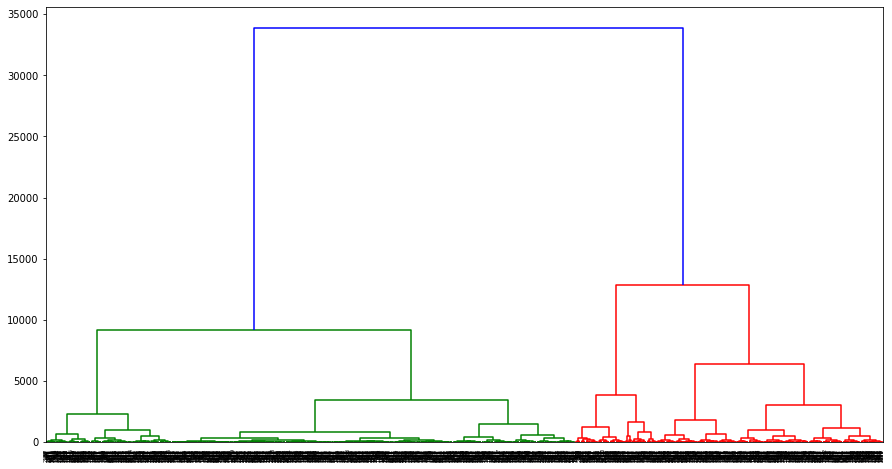

In [ ]:
plt.figure(figsize=(15,8))
dendr = dendrogram(X)
plt.show()

In [ ]:
df4['Labels'] = fcluster(X, 5, criterion = 'maxclust')
pd.value_counts(df4['Labels'])

2    1079
5     390
1     336
3     216
4     216
Name: Labels, dtype: int64

In [ ]:
df4["Labels_1"] = df4["Labels"].map({1:"Primero", 2:"Segundo", 3:"Tercero", 4:"Cuarto", 5:"Quinto"})

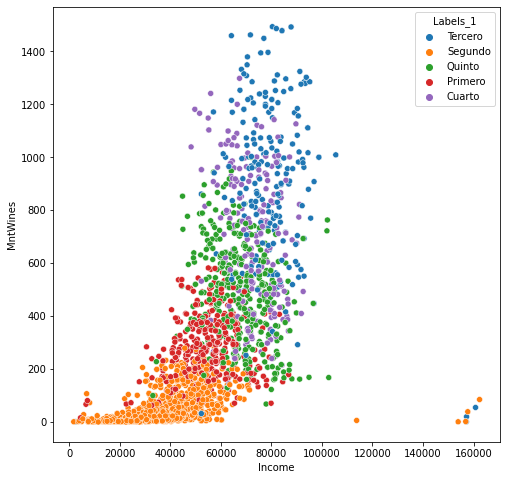

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Income", y='MntWines', hue='Labels_1', data=df4)
plt.show()

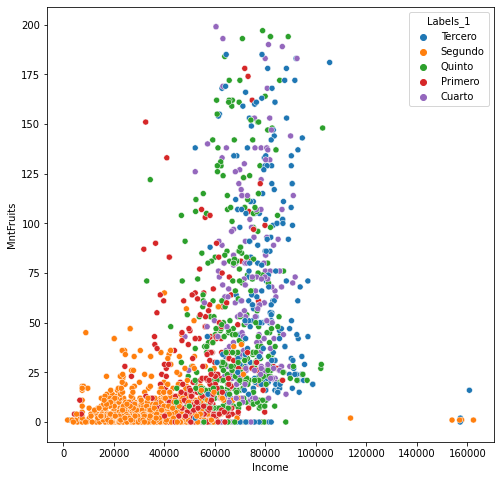

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Income", y='MntFruits', hue='Labels_1', data=df4)
plt.show()

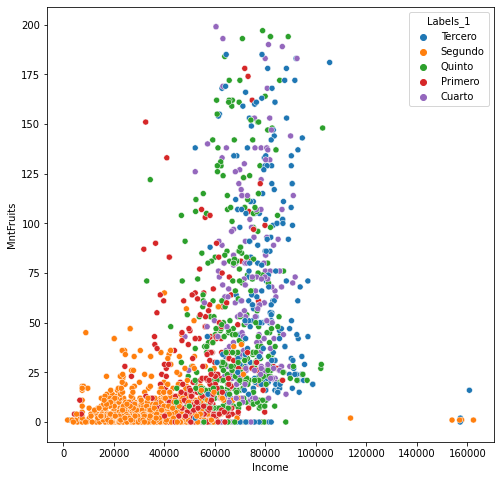

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Income", y='MntFruits', hue='Labels_1', data=df4)
plt.show()

In [ ]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 200)
pd.set_option('display.max_colwidth', None)

In [ ]:
df_profile_overall = df4.describe().T

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_profile_overall['Overall Dataset'] = df_profile_overall[['25%']]
df_profile_overall = df_profile_overall[['Overall Dataset']]

# Cluster ID level summary
df_cluster_summary = df4.groupby('Labels').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_cluster_summary = df_cluster_summary[df_cluster_summary['metric'] == "25%"]
df_cluster_summary = df_cluster_summary.set_index('column')

# join into single summary dataset
df_profile = df_cluster_summary.join(df_profile_overall) # joins on Index

print(df_profile)

                    metric         1        2         3         4         5  Overall Dataset
column                                                                                      
ID                     25%   2693.75   2807.5   2713.25   3560.75   2797.25           2826.0
Year_Birth             25%   1957.00   1963.0   1957.75   1958.00   1956.00           1959.0
Education              25%      3.00      3.0      3.00      3.00      3.00              3.0
Marital_Status         25%      1.00      1.0      1.00      1.00      1.00              1.0
Income                 25%  47021.00  26488.5  72328.50  66326.25  60564.75          35523.0
Kidhome                25%      0.00      0.0      0.00      0.00      0.00              0.0
Teenhome               25%      0.00      0.0      0.00      0.00      0.00              0.0
Recency                25%     23.00     24.0     27.00     23.00     27.00             24.0
MntWines               25%    184.00      8.0    733.00    490.50    3

In [ ]:
# Overall level summary
df_profile_overall = df4.describe().T

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_profile_overall['Overall Dataset'] = df_profile_overall[['75%']]
df_profile_overall = df_profile_overall[['Overall Dataset']]

# Cluster ID level summary
df_cluster_summary = df4.groupby('Labels').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_cluster_summary = df_cluster_summary[df_cluster_summary['metric'] == "75%"]
df_cluster_summary = df_cluster_summary.set_index('column')

# join into single summary dataset
df_profile = df_cluster_summary.join(df_profile_overall) # joins on Index

print(df_profile)

                    metric         1        2         3         4         5  Overall Dataset
column                                                                                      
ID                     75%   8780.75   8372.5   7881.00   8735.50   8583.25           8427.0
Year_Birth             75%   1975.00   1979.0   1979.00   1977.25   1975.00           1977.0
Education              75%      4.25      4.0      5.00      5.00      4.00              4.0
Marital_Status         75%      2.00      2.0      2.00      2.00      2.00              2.0
Income                 75%  61490.00  44367.0  85081.00  80025.00  75127.00          68274.0
Kidhome                75%      1.00      1.0      0.00      0.00      0.00              1.0
Teenhome               75%      1.00      1.0      0.00      1.00      1.00              1.0
Recency                75%     69.00     76.0     78.00     72.25     73.00             74.0
MntWines               75%    372.25     63.0   1134.50    912.25    6

# K-means

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [ ]:
Kmeans_1 = df4[["sumatoria_compras", "sumatoria_gastos"]]
wcss = []
for i in range (1,21):
  kmeans_pca = KMeans(n_clusters = i, init="k-means++", random_state = 42)
  kmeans_pca.fit(Kmeans_1)
  wcss.append(kmeans_pca.inertia_)

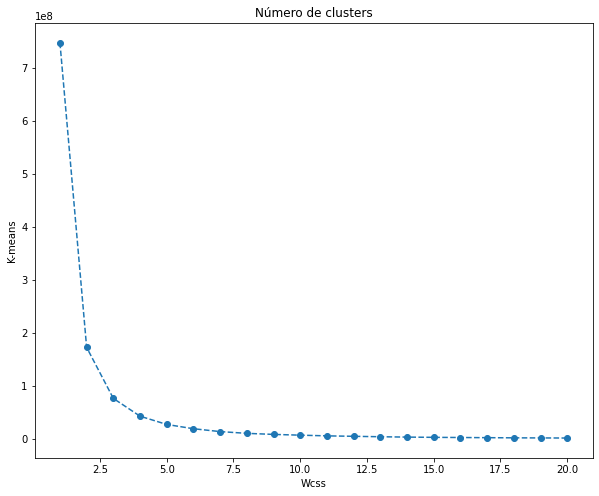

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker ="o", linestyle="--")
plt.title("Número de clusters")
plt.xlabel("Wcss")
plt.ylabel("K-means")
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 4, init="k-means++", random_state = 42)
kmeans_pca.fit(Kmeans_1)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [ ]:
df4["Segment K-means"] = kmeans_pca.labels_

In [ ]:
df4["Labels_2"] = df4["Segment K-means"].map({0:"Primero", 1:"Segundo", 2:"Tercero", 3:"Cuarto"})

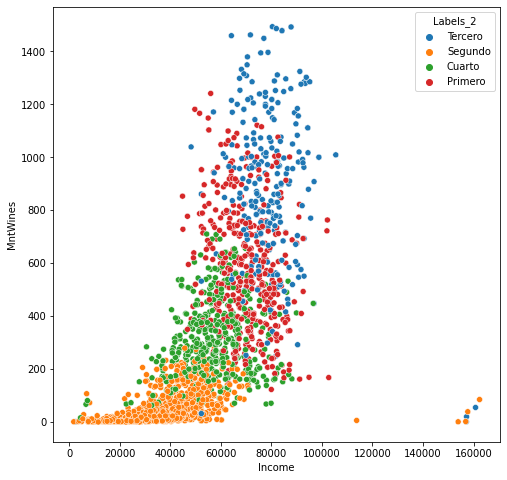

In [ ]:
plt.figure(figsize=(8,8))
sns.scatterplot(x="Income", y='MntWines', hue='Labels_2', data=df4)
plt.show()

In [ ]:
pd.value_counts(df4['Labels_2'])

Segundo    1076
Primero     450
Cuarto      447
Tercero     264
Name: Labels_2, dtype: int64

In [ ]:
# Overall level summary
df_profile_overall = df4.describe().T

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_profile_overall['Overall Dataset'] = df_profile_overall[['mean']]
df_profile_overall = df_profile_overall[['Overall Dataset']]

# Cluster ID level summary
df_cluster_summary = df4.groupby('Labels_2').describe().T.reset_index()
df_cluster_summary = df_cluster_summary.rename(columns={'level_0':'column','level_1':'metric'})

# using mean; use appropriate summarization (median, count, etc.) for each feature
df_cluster_summary = df_cluster_summary[df_cluster_summary['metric'] == "mean"]
df_cluster_summary = df_cluster_summary.set_index('column')

# join into single summary dataset
df_profile = df_cluster_summary.join(df_profile_overall) # joins on Index

print(df_profile)

                    metric        Cuarto       Primero       Segundo       Tercero  Overall Dataset
column                                                                                             
ID                    mean   5566.080537   5631.371111   5610.829926   5475.359848      5590.032633
Year_Birth            mean   1967.015660   1966.148889   1970.748141   1968.371212      1968.796603
Education             mean      3.554810      3.522222      3.338290      3.693182         3.460438
Marital_Status        mean      1.472036      1.533333      1.479554      1.515152         1.493071
Income                mean  56854.399347  69813.652228  35850.825528  78851.885432     51954.602607
Kidhome               mean      0.281879      0.064444      0.765799      0.056818         0.444345
Teenhome              mean      0.753915      0.486667      0.486059      0.208333         0.506929
Recency               mean     47.378076     49.517778     49.219331     50.965909        49.117568


Income
hijos
sumatoria_gastos
sumatoria_compras
NUmWebVisitsMonth
acepto_campanas

Del analisis de CLusters se pudo identificar 4 grupos de consumidores:

Grupo Primero: Cuentan con un ingreso promedio de 69.813, no suelen tener hijos, tienen un gasto promedio de 1084. 

Grupo Segundo:

Grupo Tercero:

Grupo Cuarto:



# FALTA HACER EL SCALING antes del cluster

# PCA

In [ ]:
df4.head()

ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0  5524        1957          3               2  58138.0        0         0  2012-09-04       58       635         88              546              172                88            88   
1  2174        1954          3               2  46344.0        1         1  2014-03-08       38        11          1                6                2                 1             6   
2  4141        1965          3               1  71613.0        0         0  2013-08-21       26       426         49              127              111                21            42   
3  6182        1984          3               1  26646.0        1         0  2014-02-10       26        11          4               20               10                 3             5   
4  5324        1981          5               1  58293.0        1         0  2014-01-19       94       173         43              118               46                27            15   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  Response  Age  \
0                  3                8                   10                  4                  7             0             0             0             0             0         0         1   65   
1                  2                1                    1                  2                  5             0             0             0             0             0         0         0   57   
2                  1                8                    2                 10                  4             0             0             0             0             0         0         0   74   
3                  2                2                    0                  4                  6             0             0             0             0             0         0         0   46   
4                  5                5                    3                  6                  5             0             0             0             0             0         0         0   47   

   sumatoria_gastos  acepto_campanas  sumatoria_compras  dif_de_dias  Hijos  Tiene_hijos  Labels Labels_1  Segment K-means Labels_2  
0              1529                1                 22         3325      0            0       3  Tercero                2  Tercero  
1                26                0                  4         2775      2            1       2  Segundo                1  Segundo  
2               755                0                 20         2974      0            0       5   Quinto                3   Cuarto  
3                50                0                  6         2801      1            1       2  Segundo                1  Segundo  
4               395                0                 14         2823      1            1       1  Primero                3   Cuarto

In [ ]:
df_pca = df4.drop(["ID", "Dt_Customer", "Labels"], axis = 1)


In [ ]:
scaler = StandardScaler()
segmentation_stf = scaler.fit_transform(df_pca)

ValueError: ignored

In [ ]:
pca = PCA()
pca.fit(segmentation_stf)

In [ ]:
pca.explained_variance_ratio_

In [ ]:
plt.figure(figsize=(10,8))
plt.plot(range(1, 33), pca.explained_variance_ratio_.cumsum(), marker ="o", linestyle="--")
plt.title("Varianza explicada por los componentes")
plt.xlabel("Cantidad de componentes")
plt.ylabel("Varianza acumulada explicada")

In [ ]:
pca = PCA(n_components=14)
pca.fit(segmentation_stf)

In [ ]:
pca.transform(segmentation_stf)

In [ ]:
scores_pca = pca.transform(segmentation_stf)

In [ ]:
#https://365datascience.com/tutorials/python-tutorials/pca-k-means/

In [ ]:
wcss = []
for i in range (1,21):
  kmeans_pca = KMeans(n_clusters = i, init="k-means++", random_state = 42)
  kmeans_pca.fit(scores_pca)
  wcss.append(kmeans_pca.inertia_)

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,21), wcss, marker ="o", linestyle="--")
plt.title("Número de clusters")
plt.xlabel("Wcss")
plt.ylabel("K-means con PCA")
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 3, init="k-means++", random_state = 42)
kmeans_pca.fit(scores_pca)

In [ ]:
df_segm_pca_kmeans = pd.concat([df_pca.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-3:] = ["Componente 1", "Componente 2", "Componente 3"]
df_segm_pca_kmeans["Segment K-means PCA"] = kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans.head()

In [ ]:
df_segm_pca_kmeans["Segment"] = df_segm_pca_kmeans["Segment K-means PCA"].map({0:"Primero", 1:"Segundo", 2:"Tercero"})

In [ ]:
x_axis = df_segm_pca_kmeans["Componente 2"]
y_axis = df_segm_pca_kmeans["Componente 1"]
plt.figure(figsize = (10,8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans["Segment"], palette = ["g", "r", "c"])
plt.title("Cluster por componentes PCA")
plt.show()